# 통신사 고객이탈 데이터 분석

## 프로젝트 
통신 서비스 고객의 이탈(Churn)을 가입기간(tenure) 단계별로 분해해, 단계별로 작동하는 핵심 요인을 식별하고, 고객이 떠나지 않게 만들 구체적인 실행 대책을 뽑는 것이다.

# 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df = pd.read_csv(r'C:\Users\Admin\hipython\데이터 분석 보고서/cust_data_v1.csv')
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,...,NaN,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22,Yes,Yes,Fiber optic,No,...,NaN,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10,No,No phone service,DSL,Yes,...,NaN,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,28,Yes,Yes,Fiber optic,No,...,NaN,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,62,Yes,No,DSL,Yes,...,NaN,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

# 데이터 전처리

In [8]:
df = df.copy()

# 1) 타깃
df["Churn01"] = df["Churn"].map({"Yes": 1, "No": 0})

# 2) 데이터 타입
## 숫자형 변환
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

## 결측 보정 (숫자형 소수 결측은 중앙값으로)
df["MonthlyCharges"] = df["MonthlyCharges"].fillna(df["MonthlyCharges"].median())
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# 3) 고객이탈을 가입기간 단계로 분해
bins = [-1, 3, 12, np.inf]
labels = ["early(0-3)", "mid(4-12)", "late(13+)"]
df["tenure_stage"] = pd.cut(df["tenure"], bins=bins, labels=labels)

# 4) 범주형 소수 결측은 Unknown
small_cat_cols = ["gender","SeniorCitizen","Dependents","PhoneService","Contract","PaymentMethod"]
for c in small_cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("object").fillna("Unknown")

# 5) Yes/No 계열: 인터넷 서비스 없는 경우 vs 진짜 결측 분리
# 결측이 “정상적인 구조적 결측”인지 “진짜 누락(정보 부족)”인지 구분
yn_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

def fill_yn(d, col):
    s = d[col].astype("object")
    s = np.where(s.isna() & (d["InternetService"] == "No"), "No internet service", s) # s.isna() : 해당 옵션 컬럼이 결측인 행, d["InternetService"] == "No" : 인터넷 서비스 자체를 쓰지 않는 고객
    return pd.Series(s, index=d.index).fillna("Unknown")                              # 두 조건이 동시에 만족하면, 이 결측은 “진짜 누락”이 아니라 인터넷이 없어서 옵션이 존재할 수 없는 정상 상태.
for c in yn_cols:                                                                     # "Unknown"이 의미하는 것 : 인터넷 서비스가 있는 고객인데도 옵션값이 비어있다 → 이건 구조적 결측이 아니라 진짜 누락
    df[c] = fill_yn(df, c)

df["PaperlessBilling"] = df["PaperlessBilling"].astype("object").fillna("Unknown")


In [9]:
# 어떤 컬럽을 묶는지 정의
sec_support_cols = ["OnlineSecurity", "TechSupport", "DeviceProtection"]
ent_cols = ["StreamingTV", "StreamingMovies"]


# Yes를 1로, 나머지는 0으로 바꾸는 함수
def yes_to_1(s):
    return (s == "Yes").astype(int)

# Security-Support Index 만들기 (0~3)
df["security_support_index"] = df[sec_support_cols].apply(yes_to_1).sum(axis=1)

# Entertainment Index 만들기 (0~2)
df["entertainment_index"] = df[ent_cols].apply(yes_to_1).sum(axis=1)

# Backup Index 만들기 (0~1)
df["backup_index"] = (df["OnlineBackup"] == "Yes").astype(int)

In [10]:
# 월 단위 계약이면 1, 전자수표(전자체크)면 1, 전자수표(전자체크)면 1
# friction_score = 3 : 언제든 해지하기 쉬운 상태 + 결제/청구에서 불편한 조합
df["friction_score"] = (
    (df["Contract"] == "Month-to-month").astype(int)
    + (df["PaymentMethod"] == "Electronic check").astype(int)
    + (df["PaperlessBilling"] == "Yes").astype(int)
)

# bundle_total_index 만들기
df["bundle_total_index"] = df["security_support_index"] + df["entertainment_index"] + df["backup_index"]

# value_gap: 번들 대비 요금의 “비싸다/싸다” 정도
# 번들 점수가 같은 사람끼리 묶음, 속한 그룹의 평균 요금을 기준으로 계산
# value_gap > 0 : 같은 번들 강도 대비 내 요금이 비쌈
# value_gap < 0 : 같은 번들 강도 대비 내 요금이 쌈
# value_gap = 0 : 평균 수준
group_mean = df.groupby("bundle_total_index")["MonthlyCharges"].transform("mean")
df["value_gap"] = df["MonthlyCharges"] - group_mean

In [11]:
# 향후 모델링을 위한 인덱스 왜곡 문제 통제.
bundle_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
df["bundle_unknown_cnt"] = df[bundle_cols].eq("Unknown").sum(axis=1)

# 시각화

In [12]:
# (선택) 한글 폰트(Windows 기준)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 실제 존재하는 stage만 사용(라벨 불일치 방지)
STAGES = df["tenure_stage"].dropna().astype(str).unique().tolist()

FEATURES_DISCRETE = [
    "security_support_index",
    "entertainment_index",
    "backup_index",
    "friction_score",
    "bundle_unknown_cnt"
]
FEATURE_CONTINUOUS = ["value_gap"]

# 표본 수 n, 이탈률 churn_rate(평균), 이탈률(%) churn_rate(%) 를 계산한 요약 테이블을 만든다.
def churn_rate_table(d, x_col, stage_col="tenure_stage"):
    """x값별 이탈률/표본수 테이블 (stage별 포함)"""
    t = (d.groupby([stage_col, x_col])["Churn01"]
           .agg(n="size", churn_rate="mean")
           .reset_index())
    t["churn_rate(%)"] = t["churn_rate"] * 100
    return t

# 위에서 만든 churn_rate_table()을 이용해 x값별 이탈률 막대그래프를 그린다.
def plot_rate_bar(d, x_col, title, stage_col="tenure_stage"):
    """stage별 막대(이탈률) + 표본수 표시"""
    t = churn_rate_table(d, x_col, stage_col=stage_col)

    plt.figure(figsize=(10,4))
    ax = sns.barplot(data=t, x=x_col, y="churn_rate(%)", hue=stage_col)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel("churn_rate(%)")
    plt.tight_layout()
    plt.show()

    # 표본수 테이블도 같이 확인
    display(t.sort_values([stage_col, x_col]))

# 연속형 변수는 **분위수(qcut)**를 q개 구간으로 나눠서 구간별 이탈률을 계산하고 라인플롯으로 추세를 보여준다.
def plot_rate_line_binned(d, x_col, q=10, title=None, stage_col="tenure_stage"):
    """
    연속형 변수(x_col)를 분위수 구간화해서 (구간별) 이탈률 라인 플롯
    """
    dd = d.copy()
    dd[f"{x_col}_bin"] = pd.qcut(dd[x_col], q=q, duplicates="drop")
    t = (dd.groupby([stage_col, f"{x_col}_bin"])["Churn01"]
           .agg(n="size", churn_rate="mean")
           .reset_index())
    t["churn_rate(%)"] = t["churn_rate"] * 100

    plt.figure(figsize=(12,4))
    sns.lineplot(data=t, x=f"{x_col}_bin", y="churn_rate(%)", hue=stage_col, marker="o")
    plt.title(title or f"{x_col} (quantile bins) vs churn_rate(%) by stage")
    plt.xlabel(f"{x_col}_bin")
    plt.ylabel("churn_rate(%)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

    display(t)

# 이탈자(Churn01=1) vs 비이탈자(0)로 나눠서 특정 변수(col)의 분포 차이를 보여준다.
def plot_dist_by_churn(d, col, title=None):
    """Churn01(0/1)별 분포 비교: box + violin(선택)"""
    plt.figure(figsize=(6,4))
    sns.boxplot(data=d, x="Churn01", y=col)
    plt.title(title or f"{col} distribution by Churn01 (box)")
    plt.xlabel("Churn01 (0=No, 1=Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    sns.violinplot(data=d, x="Churn01", y=col, inner="quartile", cut=0)
    plt.title(title or f"{col} distribution by Churn01 (violin)")
    plt.xlabel("Churn01 (0=No, 1=Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# 위의 분포 비교를 stage별로 동시에 보여준다. 즉, x축은 early/mid/late, 색은 churn(0/1) 한 장에서 “stage에 따라 변수 효과가 바뀌는지”를 확인 가능.
def plot_dist_by_churn_stage(d, col):
    """stage별로 Churn01(0/1) 분포 비교(한 번에)"""
    plt.figure(figsize=(12,4))
    sns.boxplot(data=d, x="tenure_stage", y=col, hue="Churn01")
    plt.title(f"{col} | stage별 Churn01 분포 비교(box)")
    plt.xlabel("tenure_stage")
    plt.ylabel(col)
    plt.legend(title="Churn01")
    plt.tight_layout()
    plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\2389135740.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stage_tbl = (df.groupby("tenure_stage")["Churn01"]


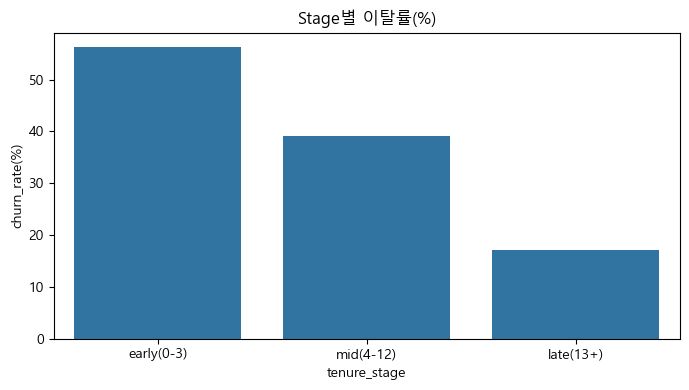

early 고객의 이탈률이 가장 높은 것으로 보아 신규 고객의 초기 경험 관리가 전사 손익에 가장 큰 영향을 미친다.


,tenure_stage,n,churn_rate,churn_rate(%)
0,early(0-3),1062,0.562147,56.214689
1,mid(4-12),1124,0.391459,39.145907
2,late(13+),4857,0.171299,17.129916


In [13]:
stage_tbl = (df.groupby("tenure_stage")["Churn01"]
               .agg(n="size", churn_rate="mean")
               .reset_index())
stage_tbl["churn_rate(%)"] = stage_tbl["churn_rate"] * 100

plt.figure(figsize=(7,4))
sns.barplot(data=stage_tbl, x="tenure_stage", y="churn_rate(%)")
plt.title("Stage별 이탈률(%)")
plt.xlabel("tenure_stage")
plt.ylabel("churn_rate(%)")
plt.tight_layout()
plt.show(), print(f"early 고객의 이탈률이 가장 높은 것으로 보아 신규 고객의 초기 경험 관리가 전사 손익에 가장 큰 영향을 미친다.")

display(stage_tbl)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\1579533822.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = (d.groupby([stage_col, x_col])["Churn01"]


독립변수의 지수가 변할 때 종속변수인 이탈률에 어떤 영향을 미치는지 가입기간 별로 분석


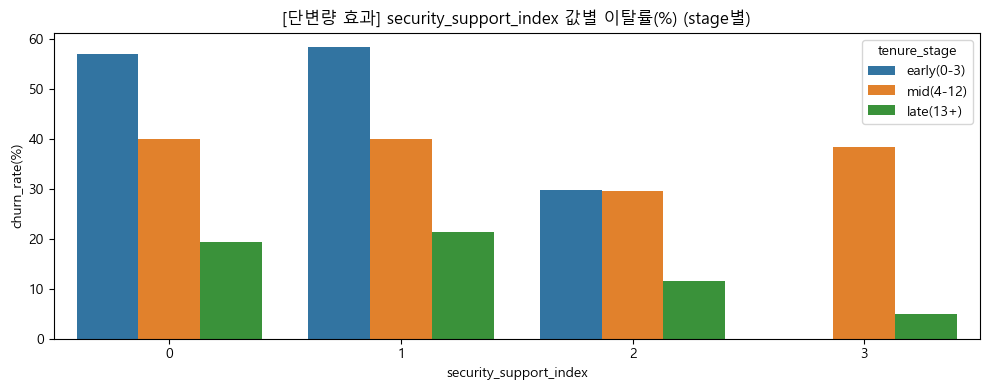

,tenure_stage,security_support_index,n,churn_rate,churn_rate(%)
0,early(0-3),0,855,0.570760,57.076023
1,early(0-3),1,168,0.583333,58.333333
2,early(0-3),2,37,0.297297,29.729730
3,early(0-3),3,2,0.000000,0.000000
4,mid(4-12),0,745,0.400000,40.000000
5,mid(4-12),1,278,0.399281,39.928058
6,mid(4-12),2,88,0.295455,29.545455
7,mid(4-12),3,13,0.384615,38.461538
8,late(13+),0,2061,0.193110,19.311014
9,late(13+),1,1365,0.213187,21.318681


C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\1579533822.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = (d.groupby([stage_col, x_col])["Churn01"]


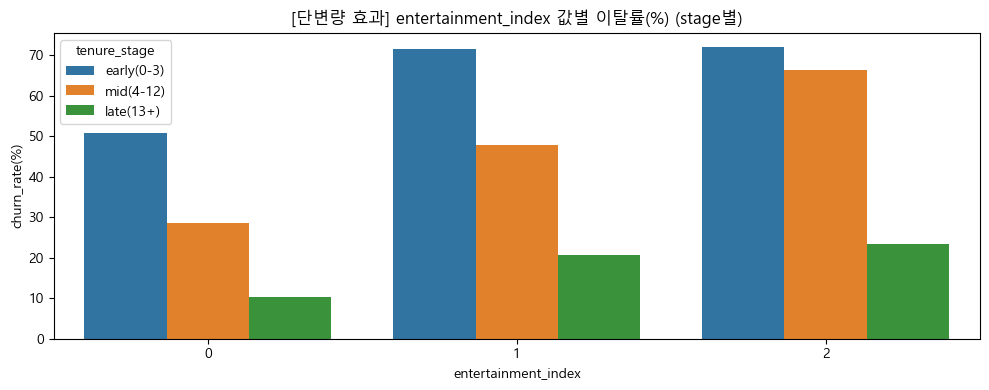

,tenure_stage,entertainment_index,n,churn_rate,churn_rate(%)
0,early(0-3),0,787,0.508259,50.825921
1,early(0-3),1,186,0.715054,71.505376
2,early(0-3),2,89,0.719101,71.910112
3,mid(4-12),0,677,0.286558,28.655835
4,mid(4-12),1,272,0.477941,47.794118
5,mid(4-12),2,175,0.662857,66.285714
6,late(13+),0,2080,0.102885,10.288462
7,late(13+),1,1101,0.206176,20.617620
8,late(13+),2,1676,0.233294,23.329356


C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\1579533822.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = (d.groupby([stage_col, x_col])["Churn01"]


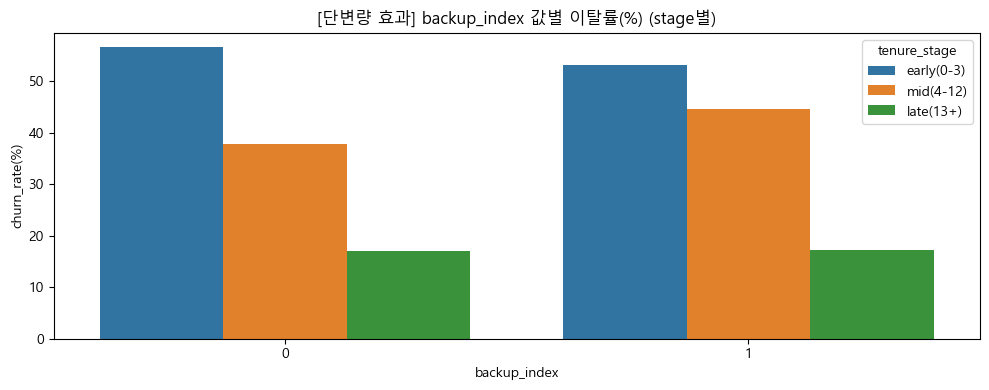

,tenure_stage,backup_index,n,churn_rate,churn_rate(%)
0,early(0-3),0,938,0.566098,56.609808
1,early(0-3),1,124,0.532258,53.225806
2,mid(4-12),0,907,0.378170,37.816979
3,mid(4-12),1,217,0.447005,44.700461
4,late(13+),0,2769,0.170459,17.045865
5,late(13+),1,2088,0.172414,17.241379


C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\1579533822.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = (d.groupby([stage_col, x_col])["Churn01"]


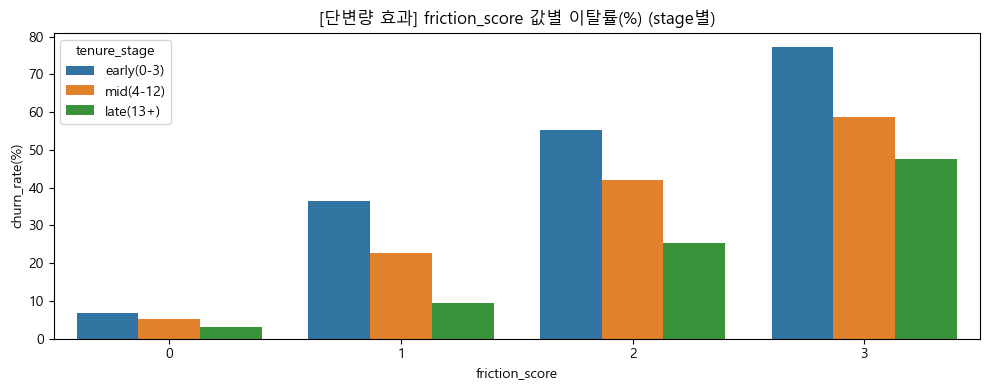

,tenure_stage,friction_score,n,churn_rate,churn_rate(%)
0,early(0-3),0,29,0.068966,6.896552
1,early(0-3),1,282,0.365248,36.524823
2,early(0-3),2,401,0.553616,55.361596
3,early(0-3),3,350,0.771429,77.142857
4,mid(4-12),0,98,0.051020,5.102041
5,mid(4-12),1,279,0.225806,22.580645
6,mid(4-12),2,397,0.420655,42.065491
7,mid(4-12),3,350,0.585714,58.571429
8,late(13+),0,1286,0.031104,3.110420
9,late(13+),1,1685,0.093769,9.376855


C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\1579533822.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = (d.groupby([stage_col, x_col])["Churn01"]


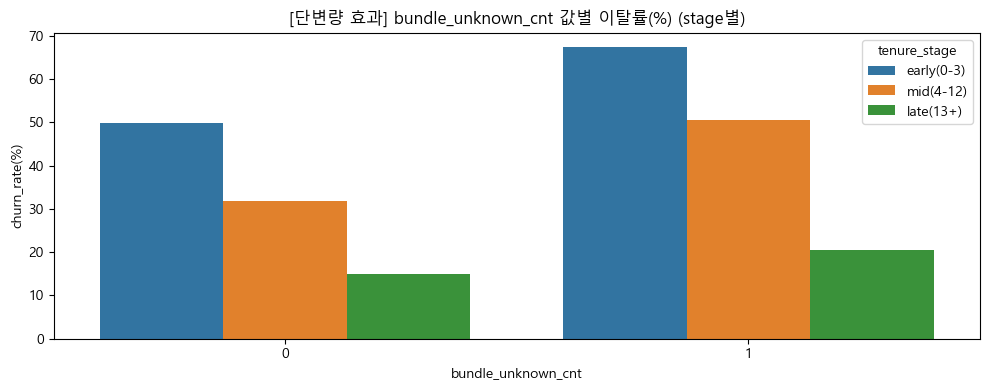

,tenure_stage,bundle_unknown_cnt,n,churn_rate,churn_rate(%)
0,early(0-3),0,673,0.497771,49.777117
1,early(0-3),1,389,0.673522,67.352185
2,mid(4-12),0,680,0.317647,31.764706
3,mid(4-12),1,444,0.504505,50.450450
4,late(13+),0,2975,0.149916,14.991597
5,late(13+),1,1882,0.205101,20.510096


In [14]:
print(f"독립변수의 지수가 변할 때 종속변수인 이탈률에 어떤 영향을 미치는지 가입기간 별로 분석")
for col in FEATURES_DISCRETE:
    plot_rate_bar(
        df, col,
        title=f"[단변량 효과] {col} 값별 이탈률(%) (stage별)"
    )

friction score와 value gap을 결합하여 불편한데 비싸기까지하면 이탈률이 어떻게 변화하는지 가입기간별로 시각화. x축이 커질수록 가치대비 가격이 높음. y축이 낮아질수록 월단위 계약, 전자체크, 전자 청구 비율이 높아짐.


C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\2146433612.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = (d.pivot_table(index="friction_score", columns="value_gap_bin",


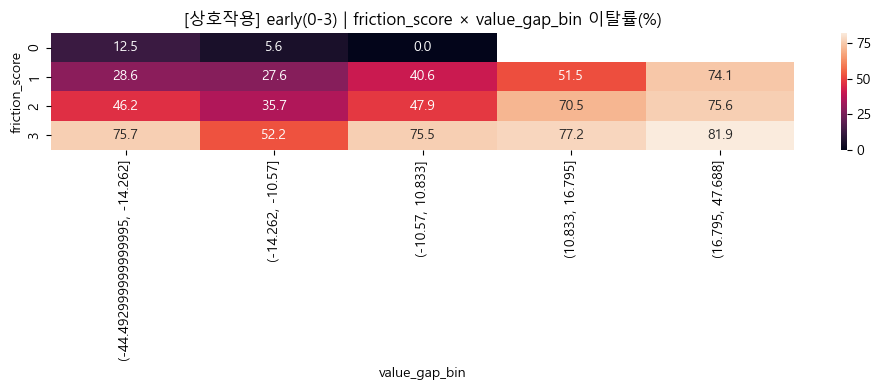

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\2146433612.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = (d.pivot_table(index="friction_score", columns="value_gap_bin",


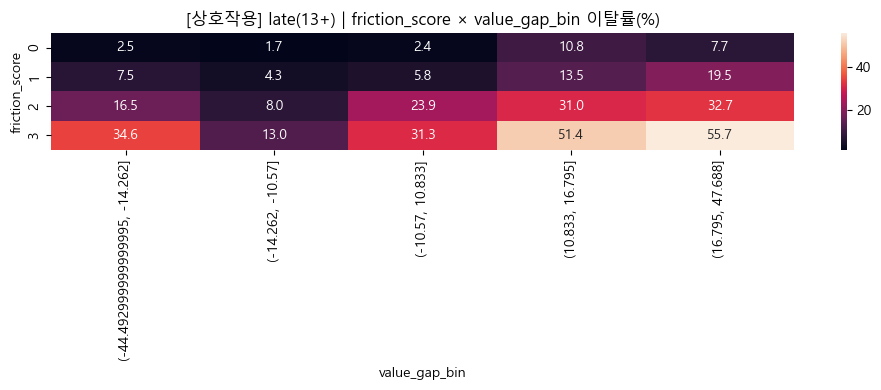

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\2146433612.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = (d.pivot_table(index="friction_score", columns="value_gap_bin",


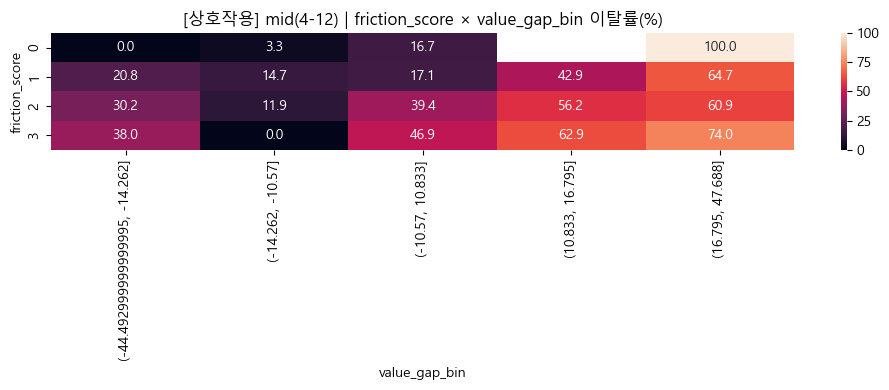

In [21]:
print(f"friction score와 value gap을 결합하여 불편한데 비싸기까지하면 이탈률이 어떻게 변화하는지 가입기간별로 시각화. x축이 커질수록 가치대비 가격이 높음. y축이 낮아질수록 월단위 계약, 전자체크, 전자 청구 비율이 높아짐.")

dd = df.copy()
dd["value_gap_bin"] = pd.qcut(dd["value_gap"], q=5, duplicates="drop")

for s in STAGES:
    d = dd[dd["tenure_stage"].astype(str) == s].copy()
    pivot = (d.pivot_table(index="friction_score", columns="value_gap_bin",
                           values="Churn01", aggfunc="mean") * 100)

    plt.figure(figsize=(10,4))
    sns.heatmap(pivot, annot=True, fmt=".1f")
    plt.title(f"[상호작용] {s} | friction_score × value_gap_bin 이탈률(%)")
    plt.xlabel("value_gap_bin")
    plt.ylabel("friction_score")
    plt.tight_layout()
    plt.show()